<a href="https://www.kaggle.com/code/matinmahmoudi/loan-data-eda-project?scriptVersionId=166681724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loan Data Exploration and Prediction

## Objective
Embark on an insightful journey into loan data analysis and prediction, designed to provide valuable learnings and practical experience in data science.

## 1. Introduction
- **Dataset Overview**: Let's start by getting familiar with our dataset – understanding its origin, contents, and significance.
- **Analysis Goals**: Our mission is to conduct a thorough data exploration and build a model to predict loan repayment.
- **Step-by-Step Guide**: I'll outline our path from data inspection to predictive insights, ensuring you know what to expect at each stage.

## 2. Data Exploration and Cleanup
- **Loading the Data**: Dive into the data by loading it and previewing the initial rows to set our context.
- **Statistical Summary**: Unveil the dataset's story through its numbers, identifying key statistics and distributions.
- **Dealing with Missing Data**: Identify and address any gaps in our data, ensuring robust analysis.
- **Ensuring Data Quality**: Confirm that each data type aligns with its expected format for accurate analysis.

## 3. Exploratory Data Analysis (EDA)
- **Individual Feature Review**: Examine each variable independently to grasp its distribution and essence.
- **Inter-feature Relationships**: Investigate how variables interact and relate to each other through various analytical techniques.
- **Identifying Outliers**: Detect and strategize on how to handle data anomalies.
- **Creative Feature Engineering**: Enhance our dataset with new or transformed features based on our EDA findings.

## Future work: 4. Data Preprocessing for Modeling
- **Encoding and Transformations**: Properly encode categorical variables and apply necessary transformations for model compatibility.
- **Scaling Features**: Normalize or standardize features to ensure equitable model treatment.
- **Train-Test Split**: Segregate our data into training and testing sets to validate model performance.

## Future work: 5. Building and Evaluating Predictive Models
- **Model Selection Rationale**: Discuss the choice of various classification models suitable for our prediction task.
- **Training the Models**: Develop models using the training data, adjusting and fine-tuning as we go.
- **Hyperparameter Optimization**: Refine our models through hyperparameter adjustments to achieve optimal performance.
- **Model Performance Assessment**: Evaluate our models using relevant metrics to gauge their predictive power.
- **Interpreting Feature Significance**: Analyze which features play pivotal roles in our predictive models.

## Future work: 6. Concluding Insights
- **Synthesizing Findings**: Summarize the key takeaways from our exploration and predictive modeling.
- **Reflecting on Implications**: Discuss the broader implications of our findings and their relevance.
- **Future Directions**: Propose next steps for further investigation or application of our learnings.



## 1. Introduction
- **Dataset Overview**: Let's start by getting familiar with our dataset – understanding its origin, contents, and significance.

### Features Explanation:

1. **credit.policy**: This binary feature reflects whether the borrower meets LendingClub.com's credit underwriting criteria (1) or not (0). This indicator is crucial as it signifies the outcome of the initial creditworthiness assessment based on the lender's policy.

2. **purpose**: A categorical variable that represents the loan's purpose, including categories like 'credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', and 'all_other'. The purpose of the loan is vital as it influences the loan's risk profile and the likelihood of repayment.

3. **int.rate**: The loan's interest rate represented as a proportion (e.g., 0.11 for 11%). Interest rates are pivotal as they reflect the lender's risk assessment—higher rates often correlate with perceived higher borrower risk.

4. **installment**: The monthly installment amount the borrower must pay if the loan is funded. Installments are significant as their size can impact the borrower's repayment capacity, especially relative to their income and other debts.

5. **log.annual.inc**: The natural logarithm of the borrower's self-reported annual income. Employing the logarithm reduces income distribution skewness, facilitating better modeling.

6. **dti**: The debt-to-income ratio, computed as debt divided by annual income. A higher DTI suggests that a large income portion is allocated to debt servicing, potentially affecting loan repayment.

7. **fico**: The FICO credit score, a critical measure of creditworthiness influencing loan approval and terms.

8. **days.with.cr.line**: The number of days the borrower has had a credit line, where longer histories might imply more financial reliability.

9. **revol.bal**: The borrower's unpaid balance at the credit cycle end, with higher balances possibly indicating financial strain.

10. **revol.util**: The rate at which the borrower utilizes their revolving credit line. Higher rates can signify elevated credit risk.

11. **inq.last.6mths**: The count of credit inquiries in the last six months, where more inquiries can suggest increased credit-seeking behavior and potential risk.

12. **delinq.2yrs**: Instances of being 30+ days late on payments in the past two years, reflecting on the borrower's reliability.

13. **pub.rec**: The count of derogatory public records like bankruptcy filings or tax liens, which can significantly impact creditworthiness.

14. **not.fully.paid**: The binary target variable indicating whether the loan was not fully repaid (1) or was (0). Our predictive modeling efforts focus on this outcome.



# 2. Data Exploration and Cleanup

## Loading the Data
Load and preview the dataset to set the stage for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


file_path = '/kaggle/input/loan-data/loan_data.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Statistical Summary
Examine the dataset's summary statistics to gain insights into the distribution and scale of each feature.

In [2]:
numerical_summary = loan_data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.000000,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,9578.000000,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,0.216400
installment,9578.000000,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,940.140000
log.annual.inc,9578.000000,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,14.528354
dti,9578.000000,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,29.960000
fico,9578.000000,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,827.000000
days.with.cr.line,9578.000000,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,17639.958330
revol.bal,9578.000000,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1207359.000000
revol.util,9578.000000,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,119.000000
inq.last.6mths,9578.000000,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,33.000000


## Dealing with Missing Data
Identify and address any missing values in the dataset to maintain the integrity of our analysis.


In [3]:
# Check for missing values in each column
missing_data = loan_data.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data


Series([], dtype: int64)

## Ensuring Data Quality
Verify that each feature's data type is appropriate for the analysis, adjusting as necessary.


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# 3. Exploratory Data Analysis (EDA)
## Individual Feature Review
Analyze the distribution and basic statistics of each feature to understand its characteristics and significance.


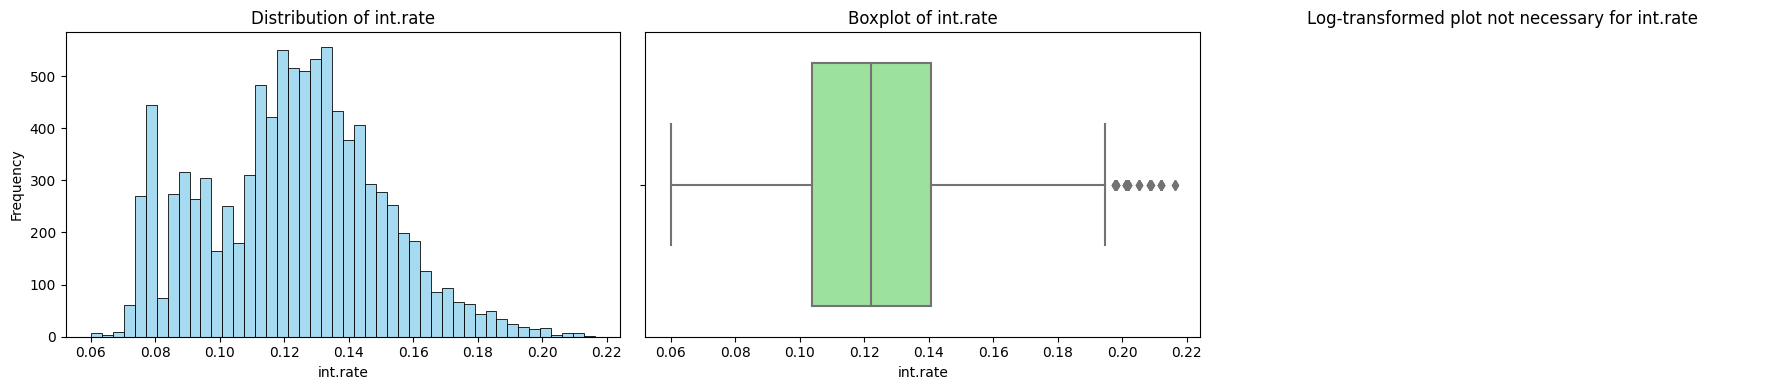

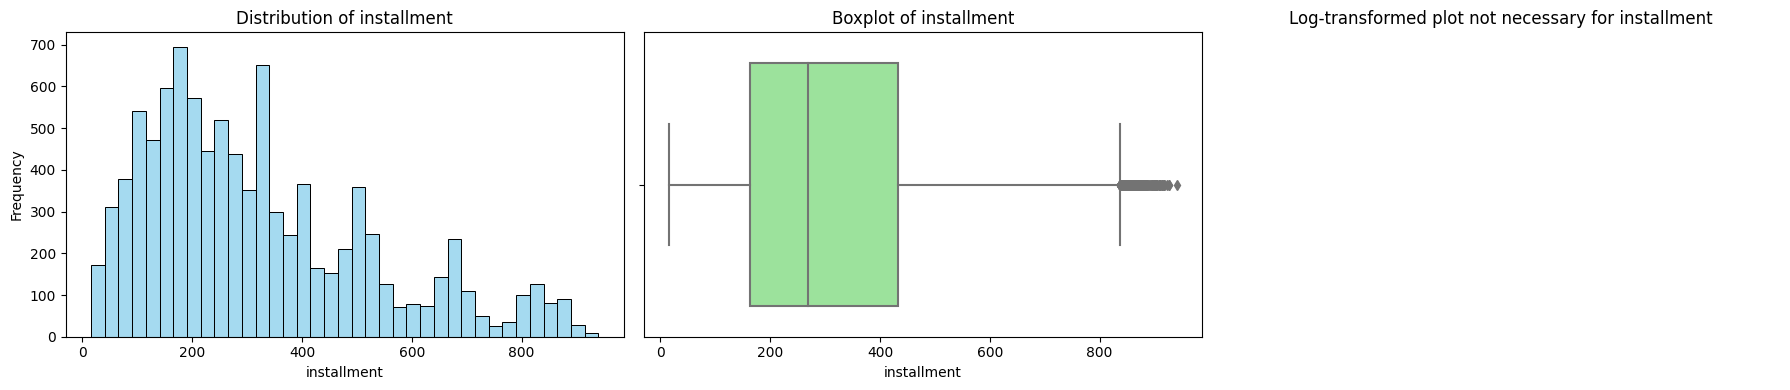

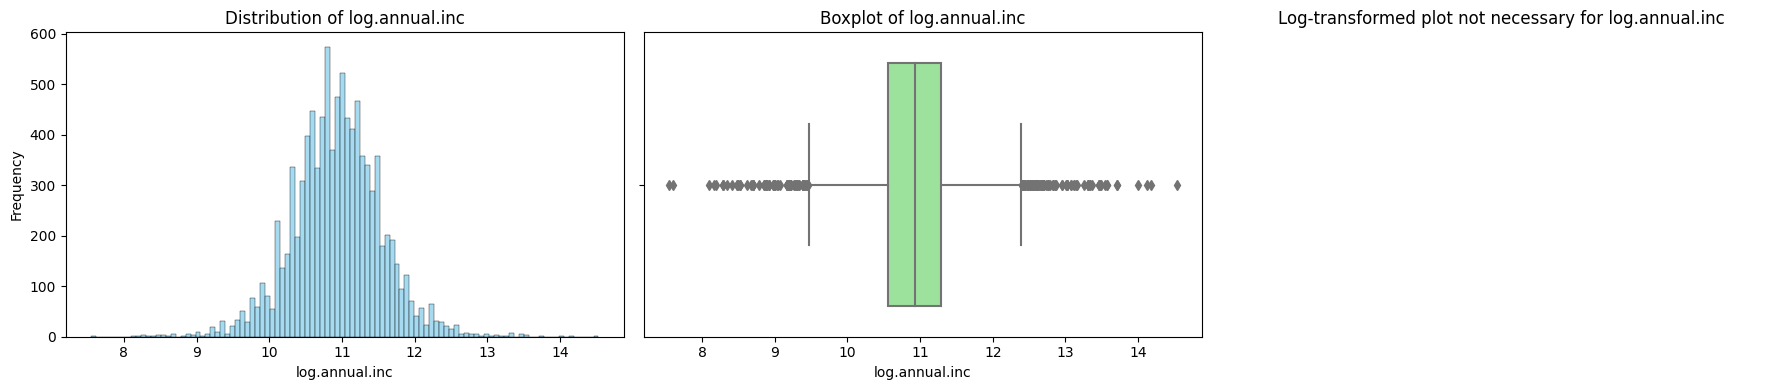

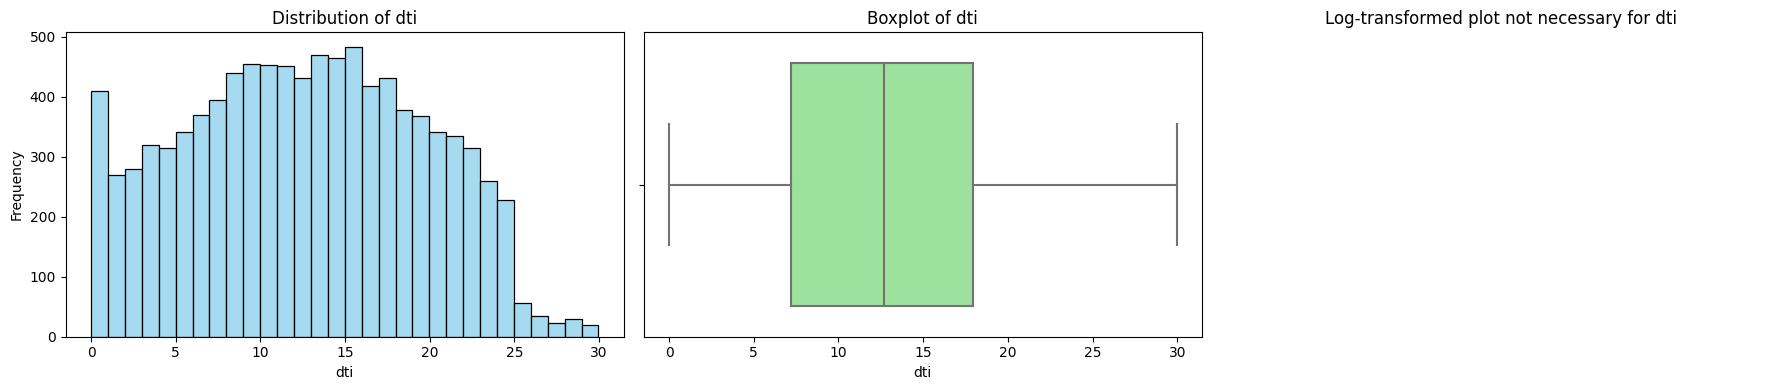

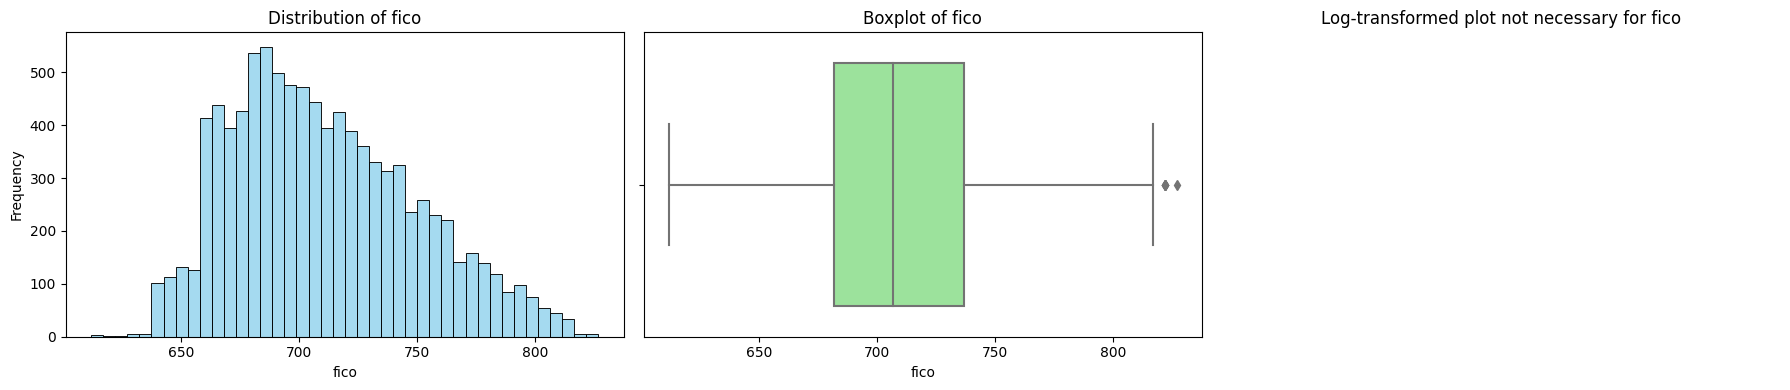

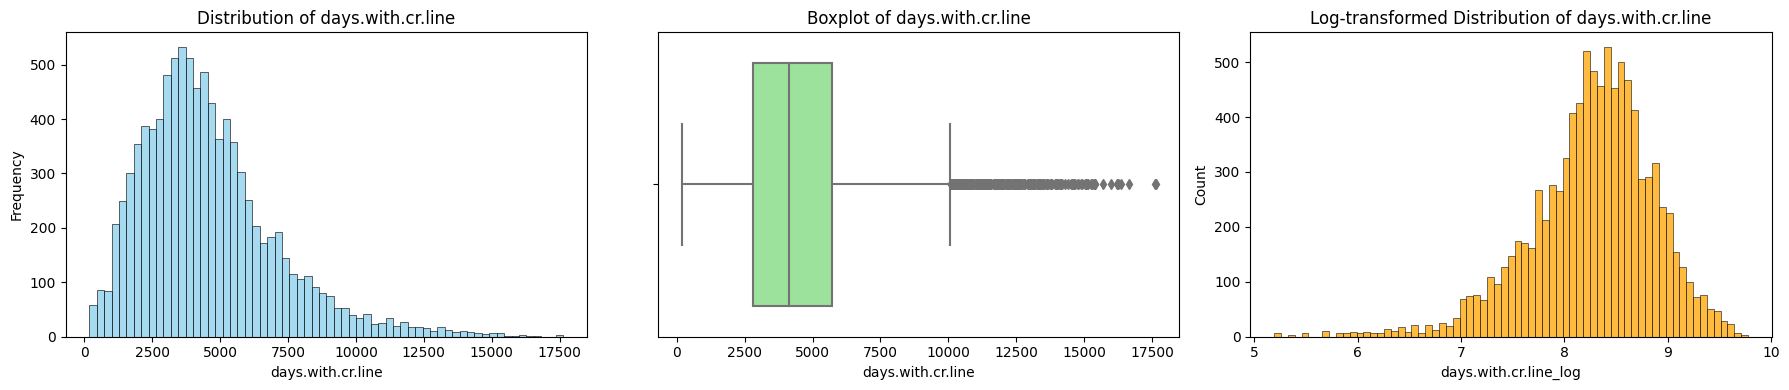

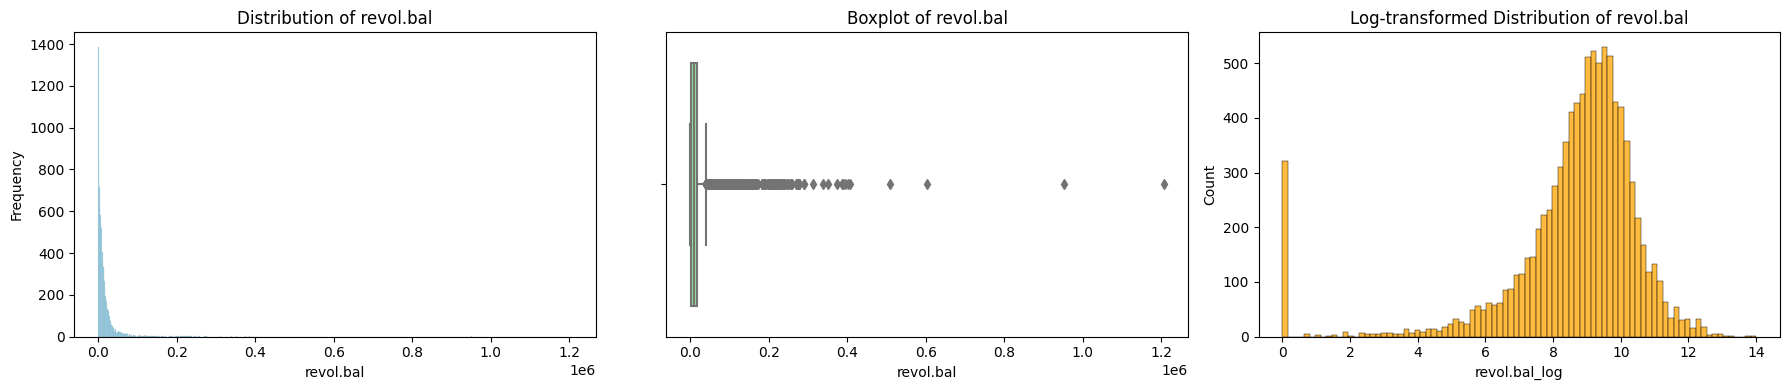

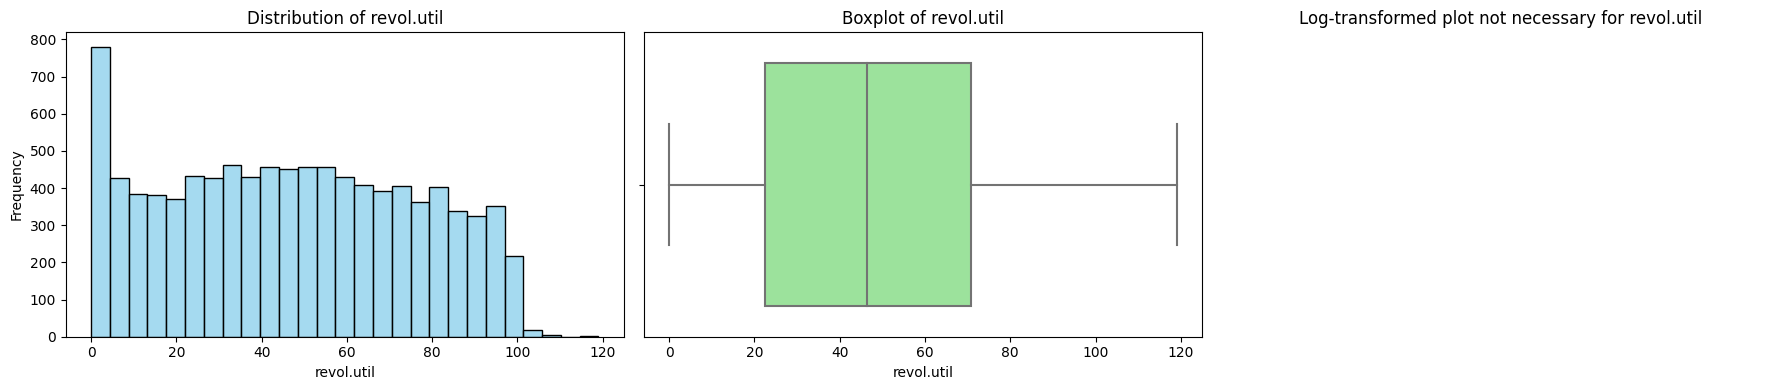

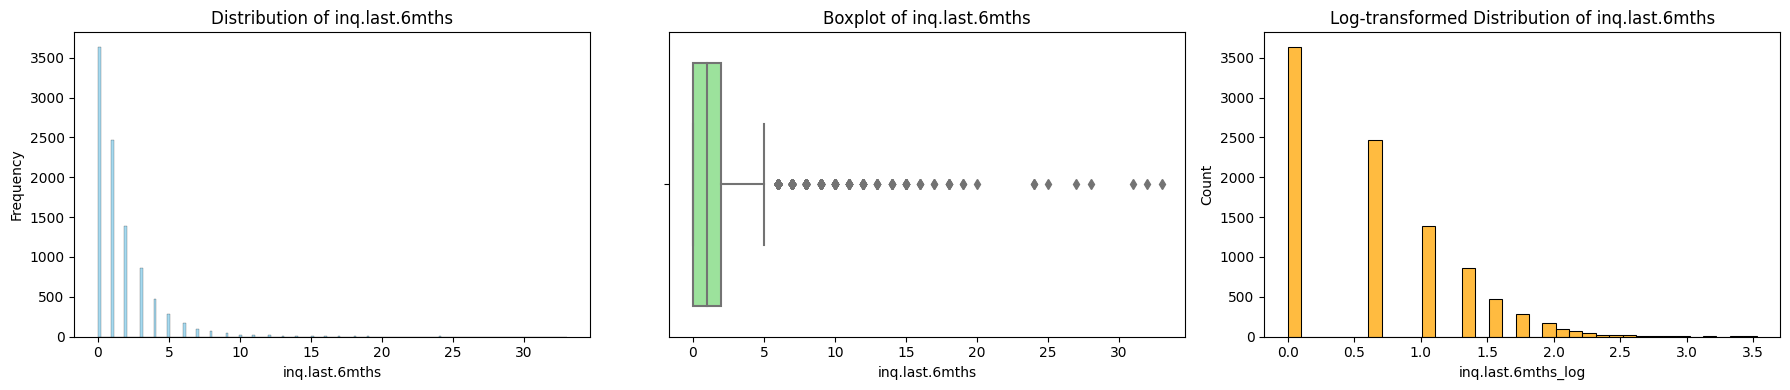

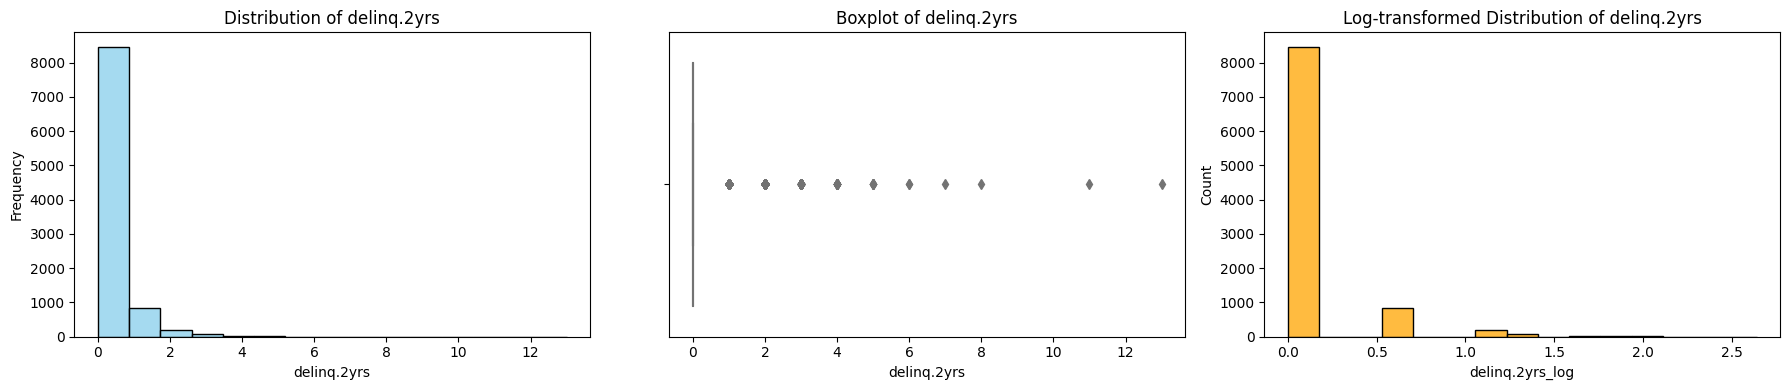

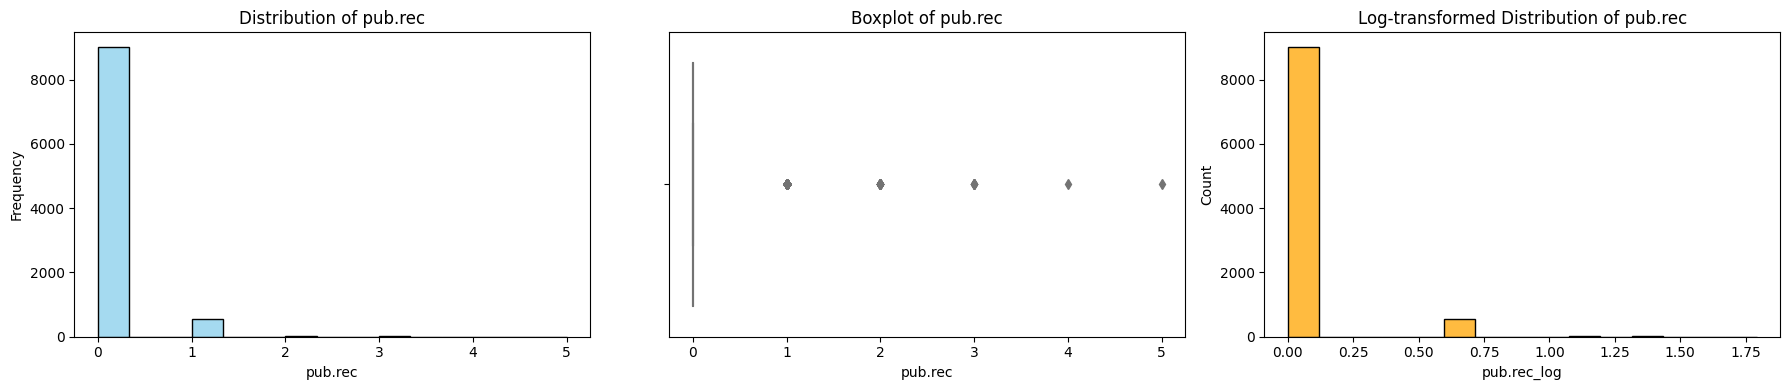

In [5]:
non_boolean_numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                                  'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 
                                  'delinq.2yrs', 'pub.rec']
boolean_numeric_features = ['credit.policy', 'not.fully.paid']

# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(loan_data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=loan_data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if loan_data[column].skew() > 1:
        loan_data[column+'_log'] = np.log1p(loan_data[column])
        sns.histplot(loan_data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()


### Inter-feature Relationships
Understanding how features within our dataset relate to one another is pivotal for gaining deeper insights and identifying potential dependencies. We'll employ correlation analysis and visualizations to uncover these inter-feature relationships.


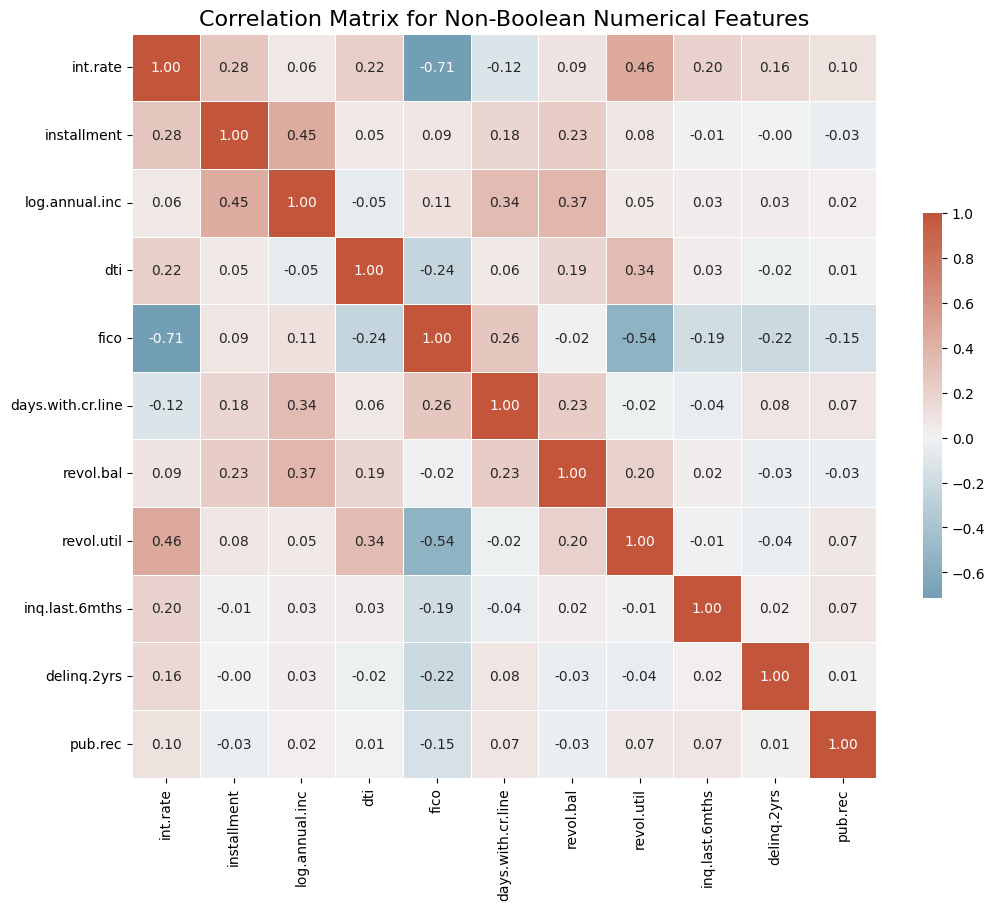

In [6]:
# Calculate the correlation matrix for non-boolean numerical features
corr_matrix = loan_data[non_boolean_numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Non-Boolean Numerical Features', fontsize=16)
plt.show()


## Handling Outliers

Outliers can significantly impact the results of data analysis and predictive modeling. To mitigate this, we applied the following strategies to handle outliers in our loan dataset:

### Log Transformation

For numerical features exhibiting significant right skewness, log transformations were applied to reduce skewness and the impact of extreme values. This transformation is beneficial for features with exponential growth or heavy-tailed distributions, common in financial data.

The transformed features are:

- Any feature with skewness greater than 1, e.g., `installment_log`, `revol.bal_log`, etc.

### Capping and Flooring

To limit the influence of extreme outlier values while retaining their presence in the dataset, we applied capping and flooring based on percentile thresholds:

- The lower bound is set at the 1st percentile.
- The upper bound is set at the 99th percentile.

This approach adjusts only the most extreme values, reducing their influence on the analysis without completely discarding potentially informative data.

The capped features are:

- All numerical features, e.g., `installment_capped`, `revol.bal_capped`, etc.

These steps aim to improve the robustness of subsequent data analysis and modeling stages, ensuring that our insights and predictions are not unduly influenced by extreme data points.


In [7]:
# Implementing the suggested outlier handling strategy:

# Apply log transformation to features with heavy right-skewness
# Define a threshold for skewness
skewness_threshold = 1
for feature in non_boolean_numerical_features:
    if loan_data[feature].skew() > skewness_threshold:
        loan_data[f'{feature}_log'] = np.log1p(loan_data[feature])

# Identify and cap/floor the extreme values for numerical features
# Capping/Flooring at the 1st and 99th percentiles
for feature in non_boolean_numerical_features:
    lower_bound = loan_data[feature].quantile(0.01)
    upper_bound = loan_data[feature].quantile(0.99)
    loan_data[f'{feature}_capped'] = np.clip(loan_data[feature], lower_bound, upper_bound)

# Displaying the transformed data frame with additional columns for log-transformed and capped features
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,installment_capped,log.annual.inc_capped,dti_capped,fico_capped,days.with.cr.line_capped,revol.bal_capped,revol.util_capped,inq.last.6mths_capped,delinq.2yrs_capped,pub.rec_capped
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1.0,0


## Creative Feature Engineering

Based on our exploratory data analysis (EDA), we have gained valuable insights into the relationships between features and identified opportunities to enhance our dataset through feature engineering. The goal of this step is to create new features or transform existing ones to uncover more predictive power from our data, which could be pivotal for subsequent modeling phases.

We will focus on the following feature engineering strategies:

1. **Interaction Terms**: Create new features that represent the interaction between significant predictors, potentially uncovering combined effects that are not captured when considering the features independently.
2. **Polynomial Features**: For features with a non-linear relationship with the target, we can create polynomial features to model these relationships more accurately.
3. **Grouping and Aggregation**: For categorical variables or variables indicating groups, we can create aggregated statistics (mean, median, etc.) that might reveal insightful trends.
4. **Binning**: Convert continuous data into categorical bins to capture the non-linear relationship with the target and reduce the influence of minor observation errors or unusual values.


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Interaction Terms - Example: Interaction between 'fico' and 'int.rate'
loan_data['fico_int_rate_interaction'] = loan_data['fico_capped'] * loan_data['int.rate_capped']

# 2. Polynomial Features - Example: Creating a squared term for 'dti'
pf = PolynomialFeatures(degree=2, include_bias=False)
dti_poly = pf.fit_transform(loan_data[['dti_capped']])
loan_data['dti_squared'] = dti_poly[:, 1]

# 3. Grouping and Aggregation - Example: Mean 'fico' score by 'purpose'
fico_mean_by_purpose = loan_data.groupby('purpose')['fico_capped'].mean().rename('mean_fico_by_purpose')
loan_data = loan_data.join(fico_mean_by_purpose, on='purpose')

# 4. Binning - Example: Binning 'fico' scores into categories
loan_data['fico_category'] = pd.cut(loan_data['fico_capped'], bins=[300, 630, 689, 719, 850], labels=['Bad', 'Fair', 'Good', 'Excellent'])


# Conclusion and Next Steps

This notebook has provided a thorough exploration of the loan dataset through various EDA techniques. We have delved into descriptive statistics, visualized distributions, analyzed correlations, and identified outliers, setting a strong foundation for further analysis.

While we have outlined potential steps for feature engineering, encoding, transformations, and data splitting, these activities are earmarked for future work. 

**We will continue this project in the future**, advancing to feature engineering, preparing the data for modeling, and eventually developing predictive models to derive insights and make informed decisions based on the dataset.

Stay tuned for the next phases of this exciting project!
